<a href="https://colab.research.google.com/github/ShafeeqAhamedS/Ex5-AAI/blob/main/Exp5_AAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
class KalmanFilter:
  def __init__ (self,F,H,Q,R,x0,P0):
    self.F = F #state transition model
    self.H = H # observation model
    self.Q = Q # process noise covariance
    self.R = R # measurement noise covariance
    self.x = x0 # initial state extimate
    self.P = P0 # initial error covariance

  def predict(self):
    #predict the next state
    self.x = np.dot(self.F, self.x)
    self.P = np.dot(np.dot(self.F, self.P),self.F.T) + self.Q

  def update(self, z):
    #update the state estimate based on the measurement z
    y = z - np.dot(self.H, self.x)
    S = np.dot(np.dot(self.H, self.P),self.H.T) + self.R
    K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
    self.x = self.x + np.dot(K, y)

In [2]:
# Example usage:
# Assume we want to track the position and velocity of a moving object
# with a state vector of [position, velocity] and a single scalar measurement
# of position.
dt = 0.1 # time step
F = np.array([[1, dt], [0, 1]]) # state transition model
H = np.array([[1, 0]]) # observation model
Q = np.diag([0.1, 0.1]) # process noise covariance
R = np.array([[1]]) # measurement noise covariance
x0 = np.array([0, 0]) # initial state estimate
P0 = np.diag([1, 1]) # initial error covariance


kf = KalmanFilter(F,H,Q,R,x0,P0)

true_states=[]
measurements=[]
for i in range(100):
  true_states.append([i*dt, 1]) #assume constant velocity of 1m/s
  measurements.append(i*dt + np.random.normal(scale=1)) # add measurement noise

# run the Kalman filter on the simulated measurements
est_states = []
for z in measurements:
    kf.predict()
    kf.update(np.array([z]))
    est_states.append(kf.x)

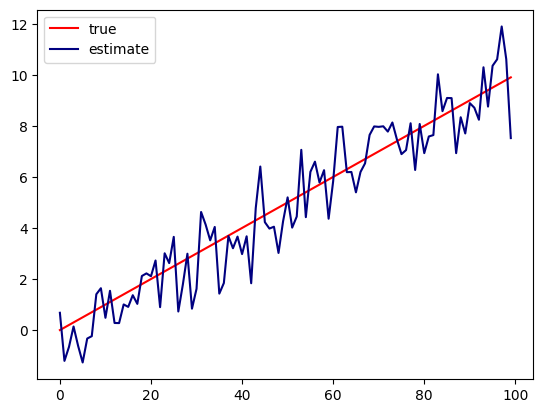

In [3]:
# plot the true and estimated positions
import matplotlib.pyplot as plt
plt.plot([s[0] for s in true_states], label='true', color='red')
plt.plot([s[0] for s in est_states], label='estimate', color='navy')
plt.legend()
plt.show()